# CAETEC Cow Detection Training
This notebook has the training process for a cow bounding box recognition model 
using YOLOv8 

<a target="_blank" href="https://colab.research.google.com/github/Amatt2-B/LauCows/blob/main/notebooks/CowDetection.ipynb">
  <img src="https://img.shields.io/badge/Open%20in%20Colab-F9AB00?style=for-the-badge&logo=google-colab&color=525252" alt="Open in Colab"/>
</a>

<a target="_blank" href="https://github.com/Amatt2-B/LauCows/blob/main/notebooks/CowDetection.ipynb">
  <img src="https://img.shields.io/badge/Open%20in%20GitHub-000?style=for-the-badge&logo=github&logoColor=white" alt="Open in GitHub"/>
</a>

<a target="_blank" href="https://www.kaggle.com/kernels/welcome?src=https://github.com/Amatt2-B/LauCows/blob/main/notebooks/CowDetection.ipynb">
  <img src="https://img.shields.io/badge/Open%20in%20Kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white" alt="Open in Kaggle"/>
</a>

In [1]:
from ultralytics import YOLO
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import shutil
import os
import pathlib
from dotenv import load_dotenv
import torch
import cv2

### Running on a local environment
**IMPORTANT!!!** 

To load the path on a local environment the notebook uses a .env file
if you don't have it already, create it on the notebooks/ directory and fill the 
variables from .template.env


In [2]:
load_dotenv();
DATASET_DIR = pathlib.Path(os.getenv('COW_DETECT_PWD'))

### Running on colab

Mount your drive and add the path to the dataset directory on the `DATASET_DIR` variable


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# CHANGE THIS PATH TO YOUR DATASET DIRECTORY
DATASET_DIR = '/gdrive/Shareddrives/CNN_COW_CAETEC/DATASET/YoloCowsV2'

### Running on kaggle
**TODO**: figure if it is posible

### Dataset preparation

The following code will separate the dataset into a training an validation sub-sets
this assumes that your folder structure is

```
dataset/
├── images/
│   ├── image1.jpg
│   ├── image2.jpg
│   └── ...
└── labels/
    ├── image1.txt
    ├── image2.txt
    └── ...

```

This section separates the dataset in this structure

```
dataset/
├── train/
│   ├── images/
│   │   ├── image1.jpg
│   │   ├── image2.jpg
│   │   └── ...
│   └── labels/
│       ├── image1.txt
│       ├── image2.txt
│       └── ...
└── val/
    ├── images/
    │   ├── image3.jpg
    │   ├── image4.jpg
    │   └── ...
    └── labels/
        ├── image3.txt
        ├── image4.txt
        └── ...
```


**Important**
Only do this step if your data is not separated already

In [3]:
# Load images and labels file names
images = os.listdir(DATASET_DIR.joinpath('images'))
labels = os.listdir(DATASET_DIR.joinpath('labels'))

#### Separation

In [4]:
# 80% training 60% validation
trainImages, valImages, trainLabels, valLabels = train_test_split(
    images, labels, 
    test_size=0.2, random_state=69, shuffle=True
)

In [5]:
def ClearDir(path):
    if os.path.isdir(path):
        os.rmdir(path)

def CopyImages(imgs, labls, to='train'):
    ClearDir(DATASET_DIR.joinpath(to))

    os.mkdir(DATASET_DIR.joinpath(to))
    os.mkdir(DATASET_DIR.joinpath(to,'images'))
    os.mkdir(DATASET_DIR.joinpath(to,'labels'))

    PATH_TO = DATASET_DIR.joinpath(to)

    print(f'Moving to {to}')

    for idx, image in enumerate(imgs):
        shutil.copy(
            DATASET_DIR.joinpath('images', image),
            PATH_TO.joinpath('images', image)
        )

        shutil.copy(
            DATASET_DIR.joinpath('labels', labls[idx]),
            PATH_TO.joinpath('labels', labls[idx])
        )
    

In [6]:
CopyImages(trainImages, trainLabels, to='train')
CopyImages(valImages, valLabels, to='valid')

Moving to train
Moving to valid


#### Model Training

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [8]:
model = YOLO('yolov8n.pt')
model.to(device);

100%|██████████| 6.25M/6.25M [00:01<00:00, 5.78MB/s]


In [9]:
model.train(data=DATASET_DIR.joinpath('data.yaml'))

New https://pypi.org/project/ultralytics/8.3.25 available  Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:\Dev\Datasets\YoloCowsV2\data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

train: Scanning D:\Dev\Datasets\YoloCowsV2\train\labels... 6469 images, 404 backgrounds, 0 corrupt: 100%|██████████| 6469/6469 [00:11<00:00, 560.64it/s]


train: New cache created: D:\Dev\Datasets\YoloCowsV2\train\labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


C:\Users\Peblo\AppData\Roaming\Python\Python310\site-packages\albumentations\__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning D:\Dev\Datasets\YoloCowsV2\valid\labels... 1618 images, 104 backgrounds, 0 corrupt: 100%|██████████| 1618/1618 [00:03<00:00, 408.33it/s]


val: New cache created: D:\Dev\Datasets\YoloCowsV2\valid\labels.cache
Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.41G     0.9815       1.34      1.218         35        640: 100%|██████████| 405/405 [01:11<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:11<00:00,  4.58it/s]


                   all       1618       6636      0.924      0.912      0.958      0.754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.25G     0.8974     0.8662       1.16         38        640: 100%|██████████| 405/405 [01:06<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:10<00:00,  4.64it/s]


                   all       1618       6636      0.919      0.879      0.947      0.729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.27G     0.9437     0.8349      1.191         40        640: 100%|██████████| 405/405 [01:01<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:10<00:00,  4.99it/s]


                   all       1618       6636      0.911      0.896      0.946      0.716

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.24G     0.9627     0.8058      1.213         39        640: 100%|██████████| 405/405 [00:59<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:10<00:00,  5.04it/s]


                   all       1618       6636      0.923      0.918      0.956      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.26G     0.9392     0.7491      1.202         37        640: 100%|██████████| 405/405 [01:00<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.12it/s]


                   all       1618       6636      0.935      0.912      0.961      0.749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.24G     0.9167     0.7086      1.193         38        640: 100%|██████████| 405/405 [00:59<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:10<00:00,  5.09it/s]


                   all       1618       6636      0.929      0.928      0.965      0.752

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.25G     0.9028      0.693      1.193         47        640: 100%|██████████| 405/405 [00:59<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.11it/s]


                   all       1618       6636      0.929      0.917      0.963      0.761

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.29G     0.8842     0.6612      1.184         55        640: 100%|██████████| 405/405 [01:03<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:11<00:00,  4.49it/s]

                   all       1618       6636      0.935      0.927      0.968      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.24G     0.8667     0.6492      1.175         46        640: 100%|██████████| 405/405 [01:04<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:10<00:00,  4.81it/s]

                   all       1618       6636      0.939      0.932      0.971      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.24G     0.8581     0.6319      1.171         75        640: 100%|██████████| 405/405 [01:04<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:10<00:00,  4.82it/s]


                   all       1618       6636      0.937       0.93       0.97      0.777

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.26G     0.8483     0.6223      1.164         48        640: 100%|██████████| 405/405 [01:04<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:10<00:00,  5.03it/s]

                   all       1618       6636      0.937      0.923      0.969      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.26G     0.8377     0.6115      1.163         41        640: 100%|██████████| 405/405 [01:00<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.34it/s]

                   all       1618       6636      0.933      0.929      0.969      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.25G     0.8324     0.6024      1.157         50        640: 100%|██████████| 405/405 [00:59<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.26it/s]

                   all       1618       6636      0.945      0.931      0.971       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.27G     0.8235     0.5968      1.154         47        640: 100%|██████████| 405/405 [00:59<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.48it/s]

                   all       1618       6636      0.938      0.926      0.968      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.24G     0.8236     0.5924      1.155         35        640: 100%|██████████| 405/405 [00:59<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.42it/s]

                   all       1618       6636      0.943       0.94      0.976      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.21G     0.8165     0.5793      1.148         58        640: 100%|██████████| 405/405 [00:59<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.27it/s]

                   all       1618       6636      0.942      0.945      0.974       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.23G     0.8087     0.5752      1.144         39        640: 100%|██████████| 405/405 [00:59<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.36it/s]

                   all       1618       6636      0.949       0.94      0.975      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.24G      0.801     0.5681      1.143         50        640: 100%|██████████| 405/405 [00:59<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.41it/s]

                   all       1618       6636      0.938      0.932      0.973      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.25G     0.7966      0.566       1.14         69        640: 100%|██████████| 405/405 [00:59<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.30it/s]

                   all       1618       6636      0.942      0.945      0.974      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.25G     0.7873     0.5618      1.131         40        640: 100%|██████████| 405/405 [00:59<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.43it/s]

                   all       1618       6636      0.942      0.941      0.976      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.27G     0.7879     0.5582      1.131         64        640: 100%|██████████| 405/405 [00:59<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.36it/s]

                   all       1618       6636      0.941      0.948      0.974      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.25G     0.7822     0.5534       1.13         43        640: 100%|██████████| 405/405 [00:59<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.13it/s]

                   all       1618       6636      0.948      0.937      0.974      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.24G     0.7729     0.5476      1.125         38        640: 100%|██████████| 405/405 [00:59<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.25it/s]

                   all       1618       6636      0.946      0.939      0.976      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.25G     0.7812     0.5487      1.133         33        640: 100%|██████████| 405/405 [00:59<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.32it/s]

                   all       1618       6636      0.945      0.939      0.974        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.25G     0.7712     0.5463      1.129         29        640: 100%|██████████| 405/405 [00:59<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.25it/s]

                   all       1618       6636      0.939      0.949      0.975      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.26G     0.7644     0.5356      1.121         41        640: 100%|██████████| 405/405 [00:59<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.35it/s]

                   all       1618       6636      0.944      0.945      0.977      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.24G     0.7625      0.535      1.121         41        640: 100%|██████████| 405/405 [00:59<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.30it/s]

                   all       1618       6636      0.939       0.95      0.976      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.25G     0.7608     0.5286      1.116         45        640: 100%|██████████| 405/405 [00:59<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.26it/s]

                   all       1618       6636      0.946      0.946      0.975      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.24G     0.7552     0.5283      1.116         41        640: 100%|██████████| 405/405 [00:59<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.31it/s]

                   all       1618       6636       0.94      0.947      0.976      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.27G     0.7532      0.522      1.113         50        640: 100%|██████████| 405/405 [00:59<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.37it/s]

                   all       1618       6636      0.944      0.943      0.976      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.24G     0.7568     0.5211      1.119         29        640: 100%|██████████| 405/405 [00:59<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.29it/s]

                   all       1618       6636       0.94      0.944      0.976      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.28G     0.7495     0.5195      1.113         56        640: 100%|██████████| 405/405 [00:59<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.19it/s]

                   all       1618       6636      0.945      0.946      0.978      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.24G     0.7456      0.517      1.112         46        640: 100%|██████████| 405/405 [00:59<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.34it/s]

                   all       1618       6636      0.939      0.951      0.977       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.26G     0.7401     0.5115      1.108         44        640: 100%|██████████| 405/405 [00:59<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.40it/s]

                   all       1618       6636      0.943      0.951      0.978      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.34G     0.7318     0.5041      1.103         33        640: 100%|██████████| 405/405 [00:59<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.22it/s]

                   all       1618       6636      0.938       0.95      0.977      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.24G     0.7332     0.5048      1.105         35        640: 100%|██████████| 405/405 [00:59<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.36it/s]

                   all       1618       6636      0.943      0.946      0.978      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.25G     0.7369     0.5043      1.106         44        640: 100%|██████████| 405/405 [00:59<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.41it/s]

                   all       1618       6636       0.95      0.943      0.978      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.28G     0.7288     0.5052      1.104         36        640: 100%|██████████| 405/405 [00:59<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.28it/s]

                   all       1618       6636      0.943      0.951      0.978      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.23G     0.7315     0.5037      1.105         50        640: 100%|██████████| 405/405 [00:59<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:11<00:00,  4.53it/s]

                   all       1618       6636      0.946      0.946      0.978      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.25G     0.7245      0.496      1.098         54        640: 100%|██████████| 405/405 [00:59<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.29it/s]

                   all       1618       6636       0.94       0.95      0.979      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.23G     0.7267     0.5005      1.103         27        640: 100%|██████████| 405/405 [00:59<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.16it/s]

                   all       1618       6636       0.94      0.951      0.978      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.29G       0.72     0.4988      1.099         48        640: 100%|██████████| 405/405 [00:59<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.37it/s]

                   all       1618       6636       0.94       0.95      0.977      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.25G     0.7199     0.4913      1.098         34        640: 100%|██████████| 405/405 [00:59<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.36it/s]

                   all       1618       6636      0.944      0.953      0.978      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.25G     0.7165     0.4894      1.099         42        640: 100%|██████████| 405/405 [00:59<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.28it/s]

                   all       1618       6636      0.946      0.946      0.979      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.24G     0.7142     0.4882      1.095         53        640: 100%|██████████| 405/405 [00:59<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.36it/s]

                   all       1618       6636      0.947      0.948       0.98       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.24G     0.7114     0.4854       1.09         48        640: 100%|██████████| 405/405 [00:59<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.36it/s]

                   all       1618       6636      0.947      0.949      0.979      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.28G     0.7086     0.4855      1.095         55        640: 100%|██████████| 405/405 [00:59<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.12it/s]

                   all       1618       6636       0.94      0.954      0.979      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.24G      0.702     0.4806      1.089         31        640: 100%|██████████| 405/405 [00:59<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.40it/s]

                   all       1618       6636      0.944      0.952      0.978      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.25G     0.7092     0.4845      1.092         51        640: 100%|██████████| 405/405 [00:59<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.35it/s]

                   all       1618       6636      0.936      0.953      0.979      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.26G     0.7024     0.4788      1.087         36        640: 100%|██████████| 405/405 [00:59<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.21it/s]

                   all       1618       6636      0.945       0.95       0.98      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.26G     0.7015     0.4765      1.085         58        640: 100%|██████████| 405/405 [00:59<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.22it/s]

                   all       1618       6636      0.948      0.949       0.98      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.29G     0.6937     0.4713      1.084         30        640: 100%|██████████| 405/405 [00:59<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.36it/s]

                   all       1618       6636      0.946      0.951       0.98      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.24G     0.6948     0.4724      1.084         47        640: 100%|██████████| 405/405 [00:59<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.30it/s]

                   all       1618       6636      0.948      0.947       0.98      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.26G     0.6946     0.4706      1.086         29        640: 100%|██████████| 405/405 [00:59<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.35it/s]

                   all       1618       6636      0.947      0.949       0.98      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100       2.3G     0.6903     0.4688       1.08         56        640: 100%|██████████| 405/405 [00:59<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.26it/s]

                   all       1618       6636      0.946       0.95      0.979      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.24G     0.6909     0.4677      1.079         40        640: 100%|██████████| 405/405 [00:59<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.32it/s]

                   all       1618       6636       0.95      0.948      0.979      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.24G     0.6803     0.4607      1.078         34        640: 100%|██████████| 405/405 [00:59<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.19it/s]

                   all       1618       6636      0.944      0.952      0.979      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.26G     0.6882     0.4605       1.08         38        640: 100%|██████████| 405/405 [00:59<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.24it/s]

                   all       1618       6636      0.949      0.949      0.981      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.24G     0.6823     0.4606      1.077         25        640: 100%|██████████| 405/405 [00:59<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.35it/s]

                   all       1618       6636      0.945       0.95       0.98      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.21G     0.6818     0.4577      1.073         53        640: 100%|██████████| 405/405 [00:59<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.15it/s]

                   all       1618       6636      0.946      0.955       0.98       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.23G     0.6791     0.4543      1.076         48        640: 100%|██████████| 405/405 [00:59<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.34it/s]

                   all       1618       6636      0.949      0.946      0.981      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.27G      0.672     0.4548      1.067         35        640: 100%|██████████| 405/405 [00:59<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.26it/s]

                   all       1618       6636      0.945      0.955      0.981       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.24G     0.6693     0.4548      1.071         46        640: 100%|██████████| 405/405 [00:58<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.44it/s]

                   all       1618       6636      0.946      0.954      0.981      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.24G     0.6716     0.4515      1.067         34        640: 100%|██████████| 405/405 [00:59<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.32it/s]

                   all       1618       6636      0.947      0.952      0.981      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.23G     0.6725     0.4486       1.07         27        640: 100%|██████████| 405/405 [00:59<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.20it/s]

                   all       1618       6636      0.951      0.949      0.981      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.26G     0.6676     0.4459      1.066         31        640: 100%|██████████| 405/405 [00:59<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.30it/s]

                   all       1618       6636      0.949      0.954      0.982      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.32G     0.6672     0.4512      1.069         33        640: 100%|██████████| 405/405 [00:59<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.39it/s]

                   all       1618       6636       0.95      0.948      0.981      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.26G     0.6624     0.4447      1.064         56        640: 100%|██████████| 405/405 [00:59<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.30it/s]

                   all       1618       6636      0.949      0.953      0.982      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.25G     0.6653     0.4453      1.066         54        640: 100%|██████████| 405/405 [00:59<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.29it/s]

                   all       1618       6636      0.949      0.952      0.982      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.26G     0.6579     0.4415      1.065         28        640: 100%|██████████| 405/405 [00:59<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.40it/s]

                   all       1618       6636      0.949      0.954      0.982      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.33G     0.6571     0.4385      1.062         34        640: 100%|██████████| 405/405 [00:59<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.32it/s]

                   all       1618       6636      0.951      0.952      0.982      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.26G     0.6533     0.4396      1.062         41        640: 100%|██████████| 405/405 [00:59<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.23it/s]

                   all       1618       6636      0.948      0.952      0.981       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.26G     0.6561     0.4352       1.06         33        640: 100%|██████████| 405/405 [00:59<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.31it/s]

                   all       1618       6636      0.952       0.95      0.981       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.27G      0.649     0.4316      1.054         47        640: 100%|██████████| 405/405 [00:59<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.37it/s]

                   all       1618       6636      0.953       0.95      0.982      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.24G     0.6537     0.4358      1.061         28        640: 100%|██████████| 405/405 [00:59<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.14it/s]

                   all       1618       6636      0.947      0.952      0.981      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.28G     0.6433     0.4274      1.053         36        640: 100%|██████████| 405/405 [00:59<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.27it/s]

                   all       1618       6636       0.95      0.951      0.982      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.26G     0.6464     0.4303      1.059         39        640: 100%|██████████| 405/405 [00:59<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.38it/s]

                   all       1618       6636      0.948      0.952      0.982      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.28G     0.6455     0.4277      1.052         40        640: 100%|██████████| 405/405 [00:59<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.23it/s]

                   all       1618       6636       0.95      0.952      0.982       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.26G     0.6442     0.4262      1.057         38        640: 100%|██████████| 405/405 [00:58<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.34it/s]

                   all       1618       6636      0.948      0.952      0.982      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.25G     0.6414     0.4253      1.053         52        640: 100%|██████████| 405/405 [00:59<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.41it/s]

                   all       1618       6636      0.947      0.953      0.981      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.24G     0.6361     0.4214      1.049         58        640: 100%|██████████| 405/405 [00:59<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.24it/s]

                   all       1618       6636      0.951      0.951      0.982      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.23G     0.6359     0.4207       1.05         39        640: 100%|██████████| 405/405 [00:59<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.19it/s]

                   all       1618       6636       0.95      0.951      0.982      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.25G     0.6302     0.4157      1.047         33        640: 100%|██████████| 405/405 [00:59<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.30it/s]

                   all       1618       6636      0.947      0.953      0.982      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.25G     0.6291     0.4149      1.046         35        640: 100%|██████████| 405/405 [00:59<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.32it/s]

                   all       1618       6636      0.953      0.947      0.982      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.24G     0.6224     0.4119      1.042         36        640: 100%|██████████| 405/405 [00:59<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.31it/s]

                   all       1618       6636      0.947      0.952      0.982      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.24G     0.6266     0.4142      1.044         49        640: 100%|██████████| 405/405 [00:59<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.40it/s]

                   all       1618       6636       0.95       0.95      0.982      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.25G     0.6282     0.4103      1.047         23        640: 100%|██████████| 405/405 [01:03<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:10<00:00,  4.96it/s]

                   all       1618       6636      0.947      0.954      0.982      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.25G     0.6204     0.4095      1.039         40        640: 100%|██████████| 405/405 [00:59<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:10<00:00,  5.08it/s]

                   all       1618       6636      0.947      0.954      0.981      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.24G     0.6183     0.4068      1.038         45        640: 100%|██████████| 405/405 [00:59<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.24it/s]

                   all       1618       6636      0.952      0.951      0.981      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.26G     0.6205     0.4078      1.043         26        640: 100%|██████████| 405/405 [00:59<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.28it/s]

                   all       1618       6636      0.951      0.951      0.981      0.836


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.24G     0.5915     0.3533      1.014         16        640: 100%|██████████| 405/405 [00:58<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.22it/s]

                   all       1618       6636       0.95      0.953      0.981      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.21G     0.5771     0.3438      1.013         22        640: 100%|██████████| 405/405 [00:58<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.40it/s]

                   all       1618       6636       0.95      0.953      0.981      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.23G     0.5706     0.3374      1.009         26        640: 100%|██████████| 405/405 [00:58<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.34it/s]

                   all       1618       6636      0.951      0.952      0.981      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.24G     0.5657     0.3352      1.006         26        640: 100%|██████████| 405/405 [00:58<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.18it/s]

                   all       1618       6636      0.951       0.95      0.981      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.23G     0.5632     0.3325      1.005         24        640: 100%|██████████| 405/405 [00:57<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.33it/s]

                   all       1618       6636      0.952      0.947      0.981      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.24G     0.5599     0.3285      1.005         22        640: 100%|██████████| 405/405 [00:58<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.36it/s]

                   all       1618       6636      0.951      0.948      0.981      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.23G     0.5534      0.324     0.9955         10        640: 100%|██████████| 405/405 [00:58<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.33it/s]

                   all       1618       6636      0.951      0.949      0.982      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.22G     0.5532     0.3239      1.001         13        640: 100%|██████████| 405/405 [00:58<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.41it/s]

                   all       1618       6636      0.948       0.95      0.982      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.21G     0.5548     0.3251      1.003         11        640: 100%|██████████| 405/405 [00:57<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.44it/s]

                   all       1618       6636      0.948      0.951      0.982      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.22G     0.5496     0.3207     0.9986         20        640: 100%|██████████| 405/405 [00:58<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.23it/s]

                   all       1618       6636      0.952      0.947      0.982      0.836



100 epochs completed in 1.960 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.2.102  Python-3.10.0 torch-2.5.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:11<00:00,  4.37it/s]


                   all       1618       6636      0.951      0.951      0.981      0.836
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000020272044C40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

### Plotting training metrics

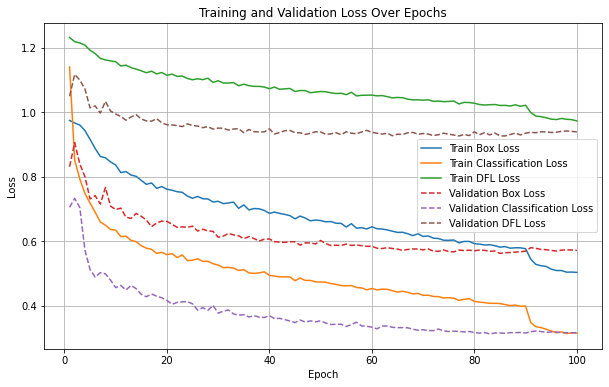

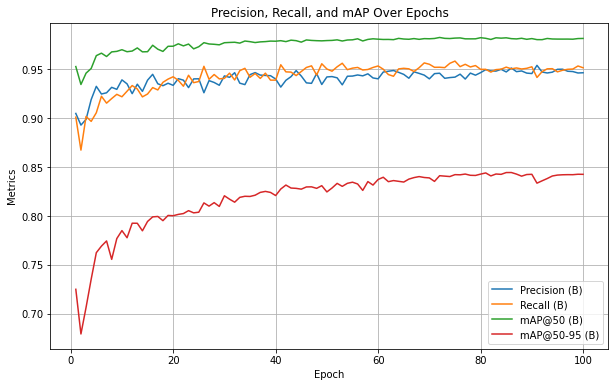

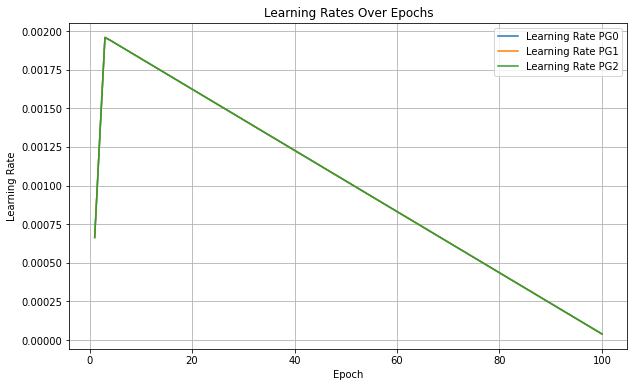

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

results = pd.read_csv(pathlib.Path('./runs/detect/train8/results.csv')) 
results.columns = results.columns.str.strip()

plt.figure(figsize=(10, 6))
plt.plot(results['epoch'], results['train/box_loss'], label='Train Box Loss')
plt.plot(results['epoch'], results['train/cls_loss'], label='Train Classification Loss')
plt.plot(results['epoch'], results['train/dfl_loss'], label='Train DFL Loss')
plt.plot(results['epoch'], results['val/box_loss'], label='Validation Box Loss', linestyle='--')
plt.plot(results['epoch'], results['val/cls_loss'], label='Validation Classification Loss', linestyle='--')
plt.plot(results['epoch'], results['val/dfl_loss'], label='Validation DFL Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(results['epoch'], results['metrics/precision(B)'], label='Precision (B)')
plt.plot(results['epoch'], results['metrics/recall(B)'], label='Recall (B)')
plt.plot(results['epoch'], results['metrics/mAP50(B)'], label='mAP@50 (B)')
plt.plot(results['epoch'], results['metrics/mAP50-95(B)'], label='mAP@50-95 (B)')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.title('Precision, Recall, and mAP Over Epochs')
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(results['epoch'], results['lr/pg0'], label='Learning Rate PG0')
plt.plot(results['epoch'], results['lr/pg1'], label='Learning Rate PG1')
plt.plot(results['epoch'], results['lr/pg2'], label='Learning Rate PG2')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rates Over Epochs')
plt.legend()
plt.grid()
plt.show()

### Export the model

In [12]:
model.export()

Ultralytics YOLOv8.2.102  Python-3.10.0 torch-2.5.0+cu124 CPU (AMD Ryzen 5 3600 6-Core Processor)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs\detect\train\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.9 MB)

TorchScript: starting export with torch 2.5.0+cu124...
TorchScript: export success  1.8s, saved as 'runs\detect\train\weights\best.torchscript' (11.9 MB)

Export complete (2.2s)
Results saved to D:\jupyter\LauCows\notebooks\runs\detect\train\weights
Predict:         yolo predict task=detect model=runs\detect\train\weights\best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs\detect\train\weights\best.torchscript imgsz=640 data=D:\Dev\Datasets\YoloCowsV2\data.yaml  
Visualize:       https://netron.app


'runs\\detect\\train\\weights\\best.torchscript'

### Plot predictions

In [11]:
image = cv2.imread('..\\testimgs\\img01.jpg')

In [12]:
preds = model.predict(image)


0: 384x640 6 cows, 43.0ms
Speed: 44.0ms preprocess, 43.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


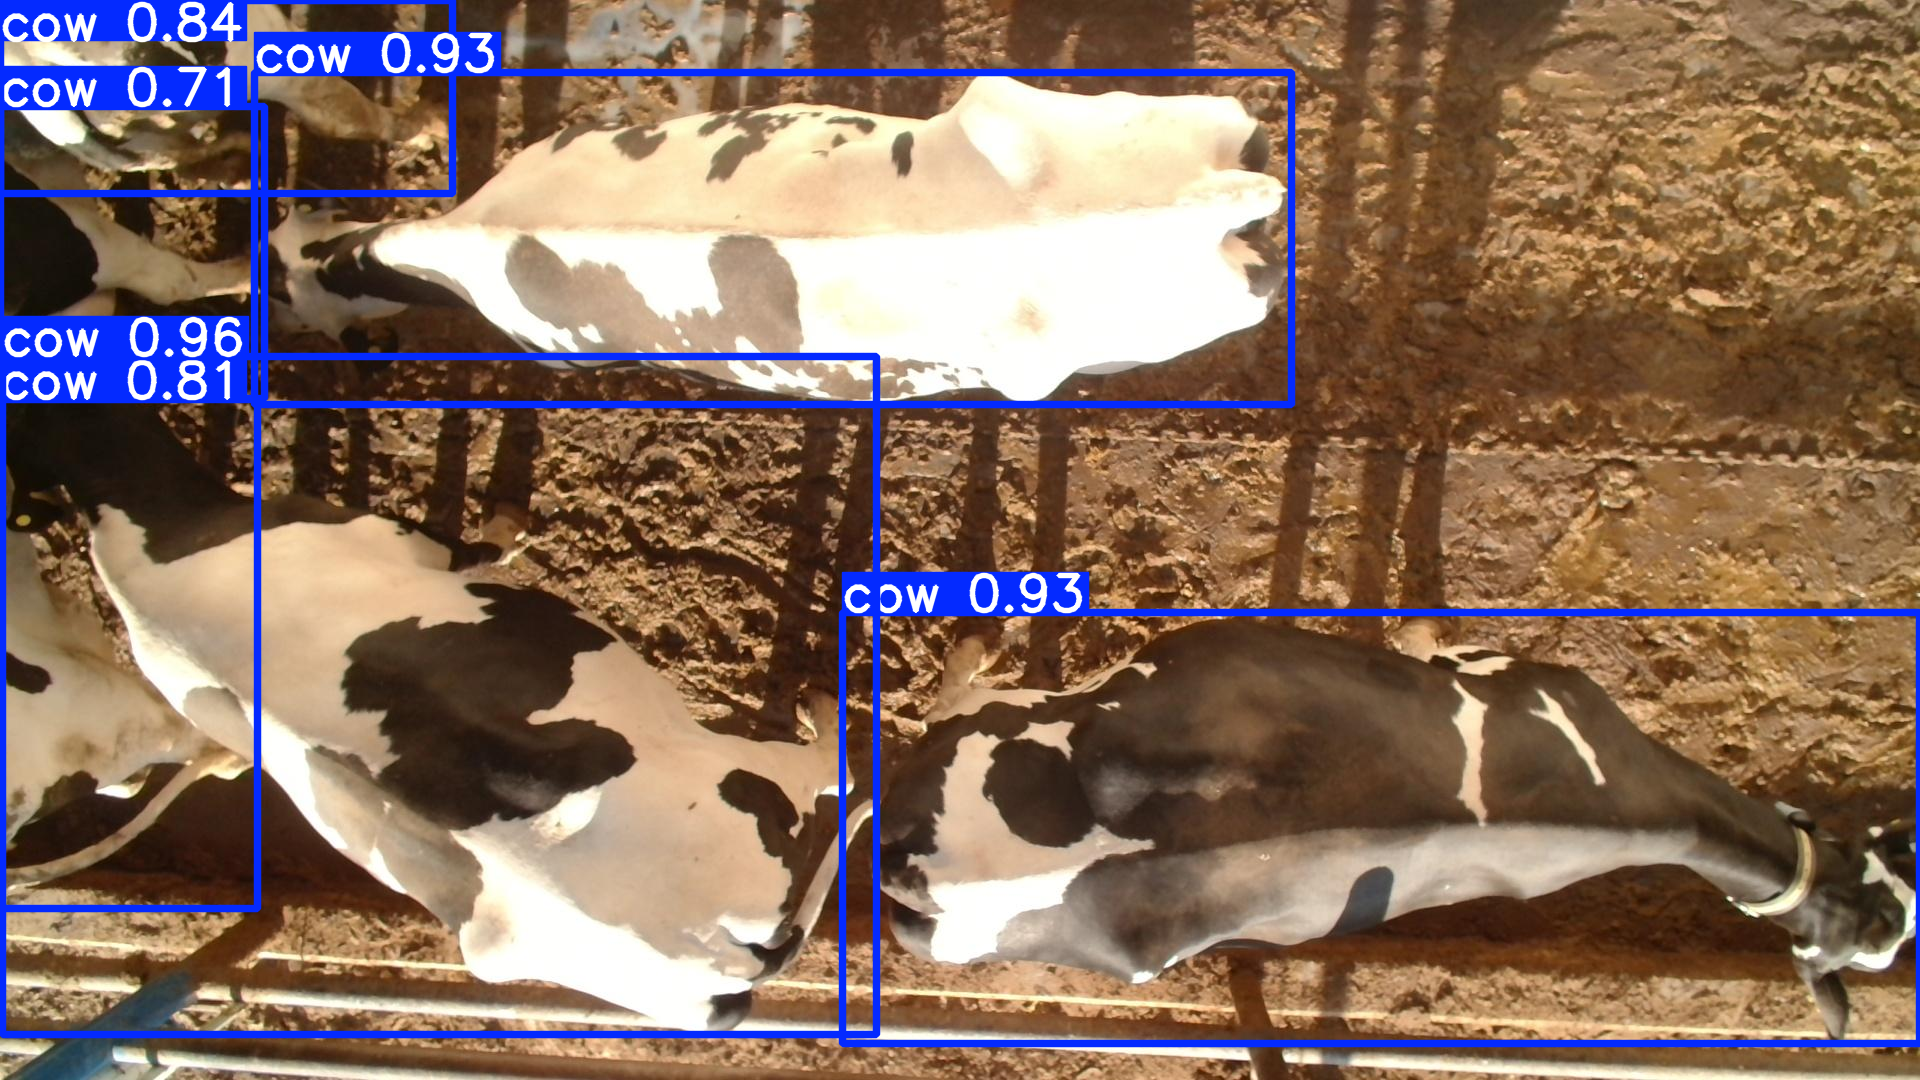

In [13]:
plot = preds[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))